In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

from scipy.optimize import minimize

In [2]:
%matplotlib notebook

In [3]:
NaD_blue = 5889.95
NaD_red = 5895.92
z = 0.0094

In [4]:
filename = '../data/spectra/ZTF19adcecwu_20200118_MMT_v1.ascii'
spec_df = pd.read_csv(filename, comment='#', delim_whitespace=True, header=None)

wv = spec_df[0].values
fl = spec_df[1].values

<IPython.core.display.Javascript object>


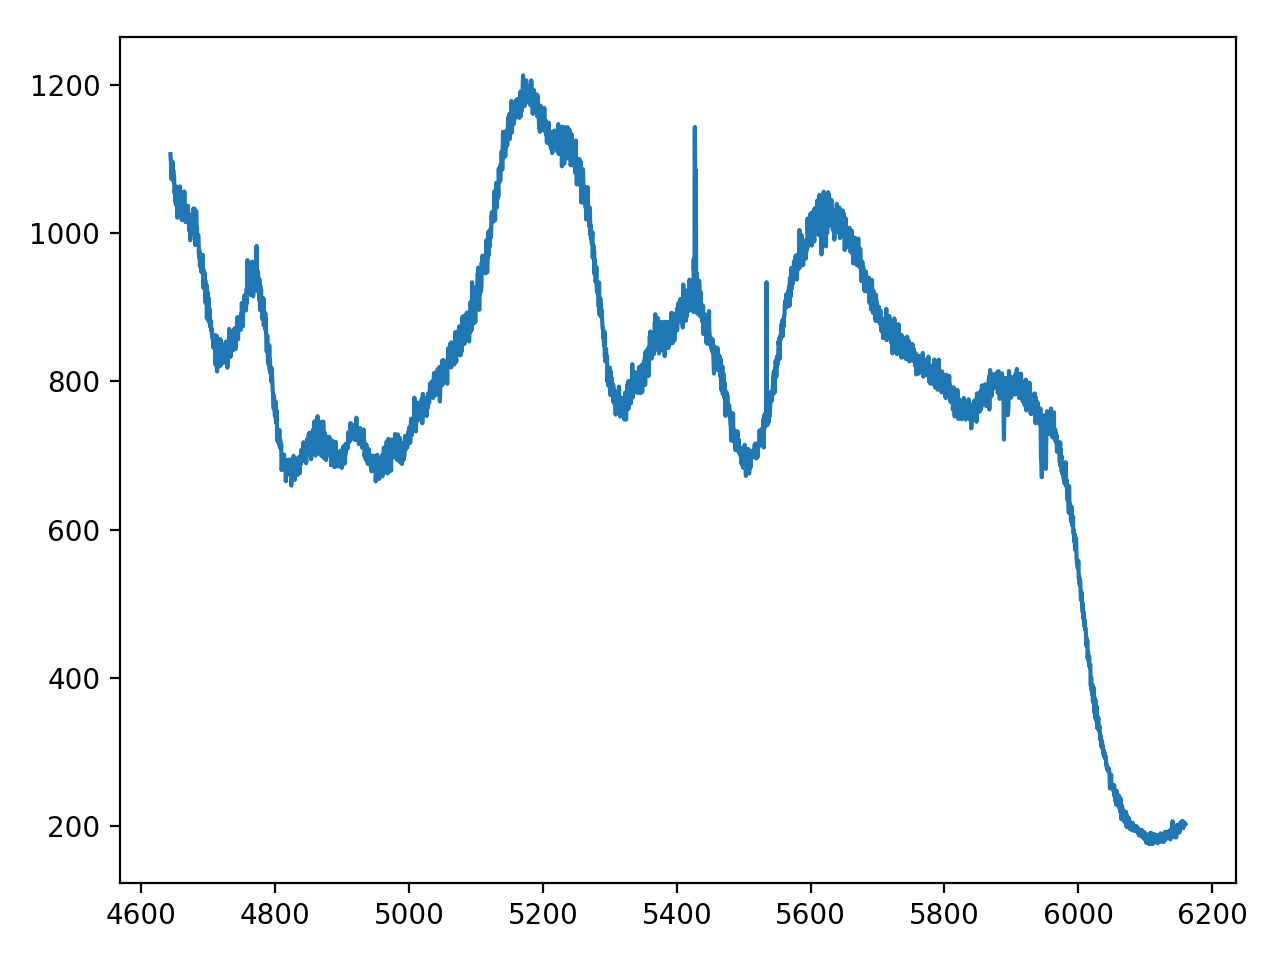

In [5]:
plt.figure()
plt.plot(wv, fl)
plt.tight_layout()

### Make a figure showing the Na D feature

In [6]:
flux_plot = np.repeat(fl, 2)
wv_plot = wv.copy()
wv_plot[:-1] += np.diff(wv)/2
wv_plot = np.append(wv[0]-(wv[1]-wv[0])/2, np.append(np.repeat(wv_plot[0:-1], 2), wv[-1]+(wv[-1]-wv[-2])/2))

In [7]:
def velocity_rf(lambda_rf, lambda_0):
    '''convert rest-frame wavelength to relative velocity'''
    c = 2.99792458e5
    v = c*((lambda_rf/lambda_0)**2 - 1)/((lambda_rf/lambda_0)**2 + 1)
    
    return v

vel_ngc4441 = velocity_rf(wv_plot/(1+z), NaD_red)

vel_mw = velocity_rf(wv_plot, NaD_red)

v_sdss = velocity_rf(NaD_red/(1+z), NaD_red/(1+0.00888))

#### Fit and remove  a continuum

In [8]:
def lnlike(theta, t, m):
    
    p0, p1, p2 = theta
    
    model = p0 + p1*t + p2*t**2 #+ p3*t**3 + p4*t**4
    
    lnl = -0.5*np.sum((m - model)**2)
    
    return lnl

def neg_lnlike(theta, t, m):
    return -1*lnlike(theta, t, m)

<IPython.core.display.Javascript object>


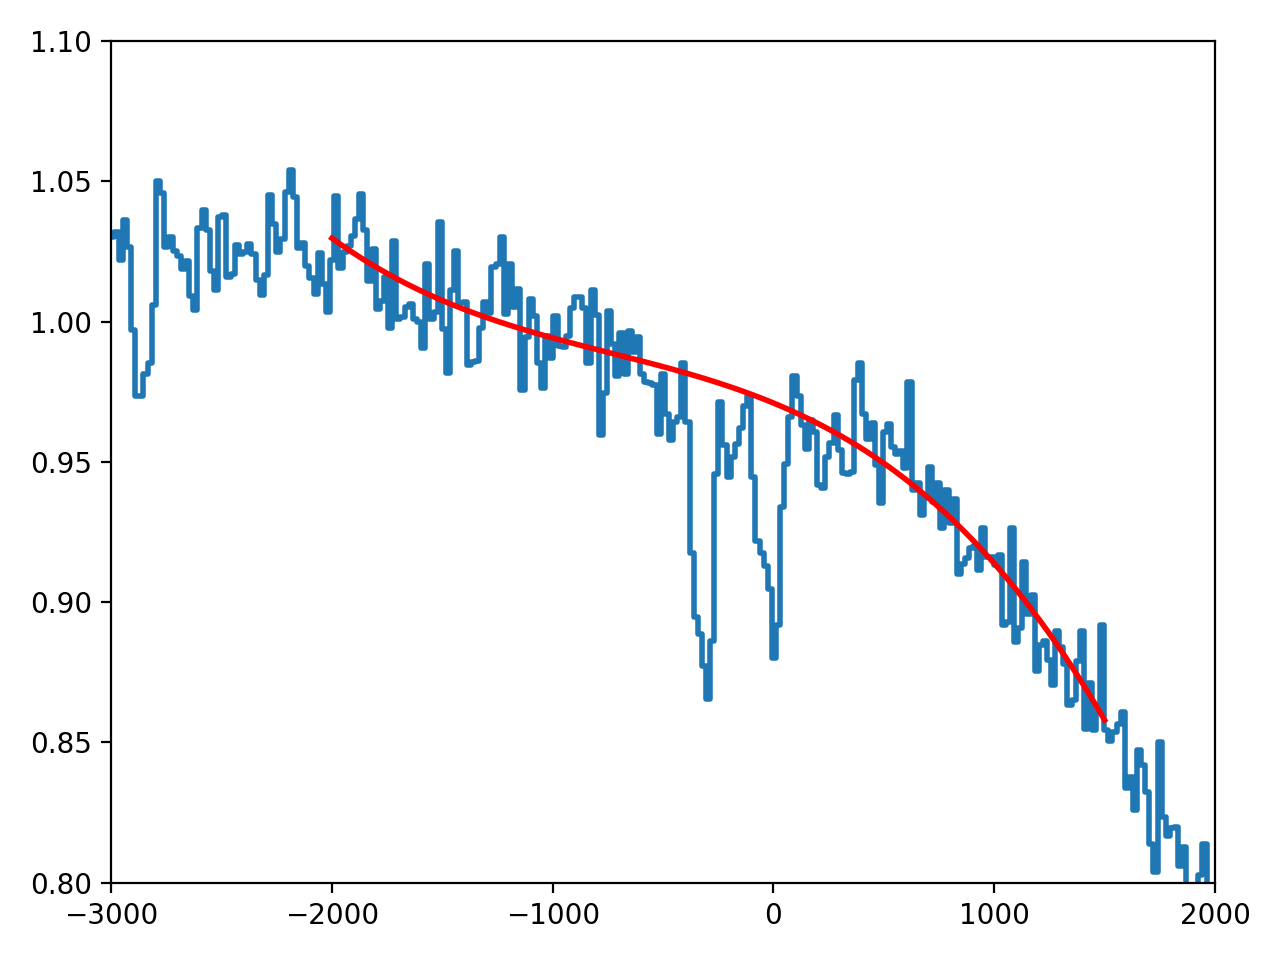

In [9]:
near_NaD = np.where(((vel_ngc4441 > -2000) & 
                     (vel_ngc4441 < -440)) | 
                    ((vel_ngc4441 > 140) & 
                     (vel_ngc4441 < 1500)))

plt.figure()
plt.plot(vel_ngc4441, flux_plot/775, 
          lw=2)
v_grid = np.linspace(-2000,1500,1000)
theta = (0.95, -5e-5,  1e-8)

z_ngc4441 = np.polyfit(vel_ngc4441[near_NaD][::2], flux_plot[near_NaD][::2], 3)
p_ngc4441 = np.poly1d(z_ngc4441)
plt.plot(v_grid, p_ngc4441(v_grid)/775, 'red', lw=2) 


plt.xlim(-3000,2000)
plt.ylim(0.8,1.1)
plt.tight_layout()

<IPython.core.display.Javascript object>


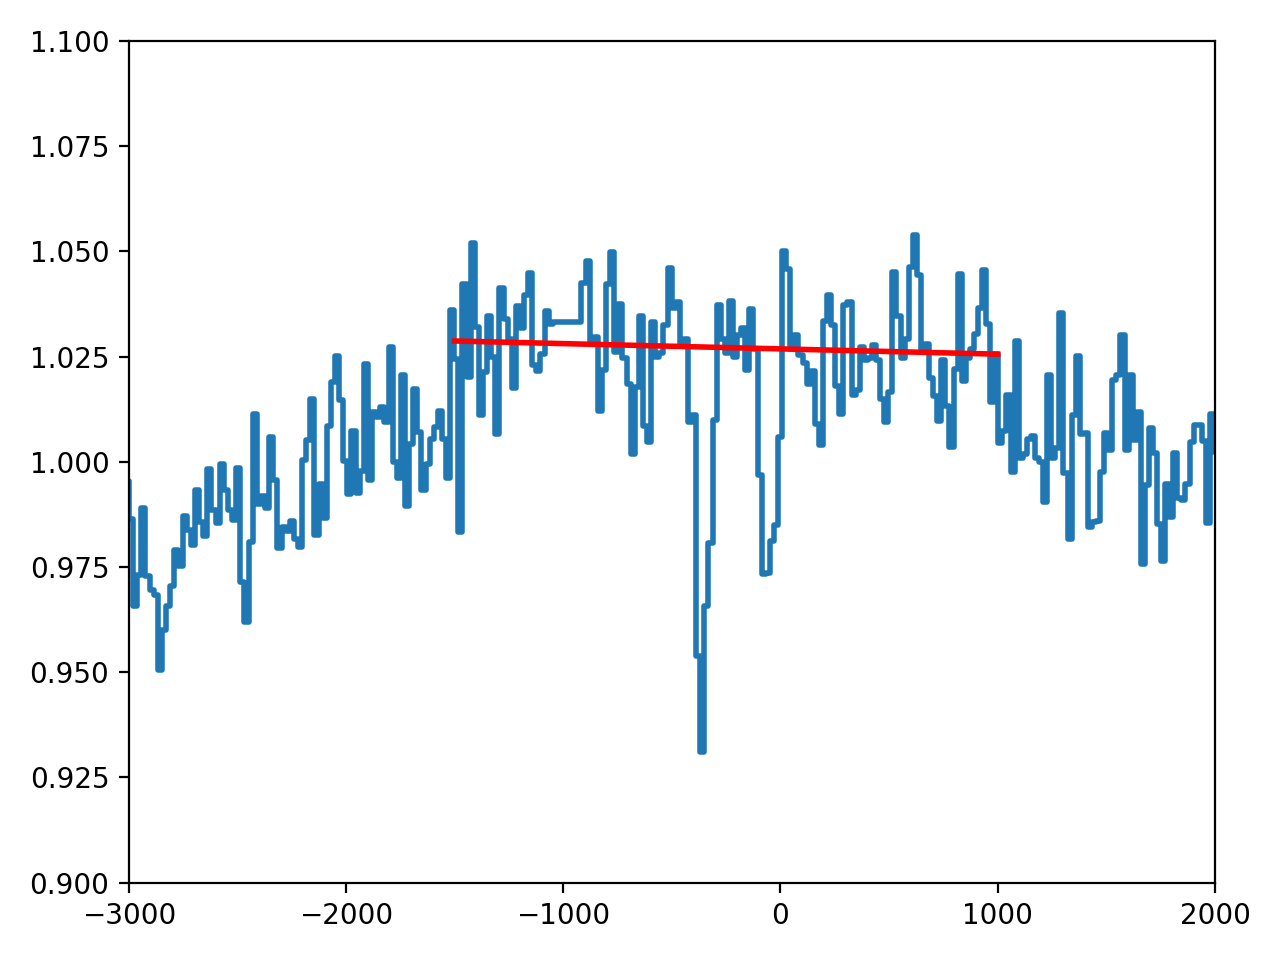

In [10]:
near_NaD = np.where(((vel_mw > -1500) & 
                     (vel_mw < -500)) | 
                    ((vel_mw > 80) & 
                     (vel_mw < 1000)))

plt.figure()
plt.plot(vel_mw, flux_plot/775, 
         lw=2)
v_grid = np.linspace(-1500,1000,1000)
theta = (0.95, -5e-5,  1e-8)

z_mw = np.polyfit(vel_mw[near_NaD][::2], flux_plot[near_NaD][::2], 1)
p_mw = np.poly1d(z_mw)
plt.plot(v_grid, p_mw(v_grid)/775, 'red', lw=2) 


plt.xlim(-3000,2000)
plt.ylim(0.9,1.1)
plt.tight_layout()

In [11]:
v_sdss

-154.48011951935396

In [18]:
ax.text?

<IPython.core.display.Javascript object>


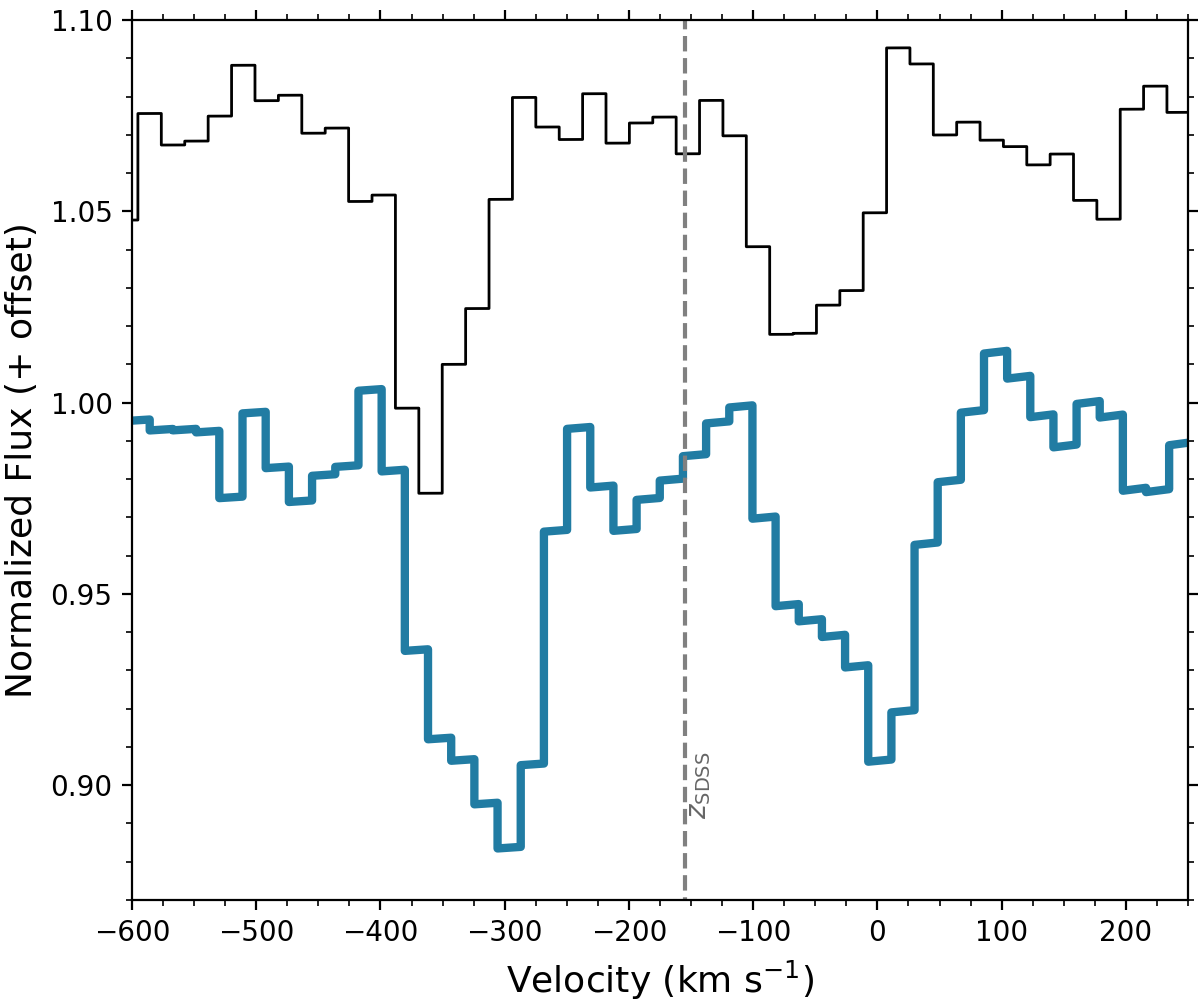

In [24]:
aam_colors = {'mustard': "#E29930",
             'blue': "#217CA3",
             'asphalt': "#32384D",
             'navy': "#444C5C",
             'punch': "#CE5A57",
             'ocean': "#78A5A3",
             'warm': "#E1B16A",}

fig, ax = plt.subplots(figsize=(6,5))
ax.plot(vel_ngc4441, flux_plot/p_ngc4441(vel_ngc4441), 
        color = aam_colors['blue'], lw=3)

ax.plot(vel_mw, flux_plot/p_mw(vel_mw)+0.07, 
        color = 'k', lw=1)

ax.plot([v_sdss,v_sdss], [-1e6, 1e6],  '0.5', ls='--')
ax.text(v_sdss, 0.9, r'$z_\mathrm{SDSS}$', rotation=90,
        color='0.4', va='center',ha='left')

ax.set_xlim(-600,250)
ax.set_ylim(0.87,1.1)
ax.set_ylabel('Normalized Flux (+ offset)',fontsize=13)
ax.set_xlabel(r'Velocity (km s$^{-1}$)', fontsize=13)
ax.tick_params(which='both', top=True,right=True)

ax.xaxis.set_minor_locator(MultipleLocator(25))
ax.yaxis.set_minor_locator(MultipleLocator(0.01))

# red_line = ax.twiny()
# red_line.set_xlabel(r'Velocity (km s$^{-1}$)', fontsize=13)
# red_line.set_xlim((np.array(ax.get_xlim())/(1+z)-NaD_red)/NaD_red*2.9979e5)

fig.subplots_adjust(left=0.11,right=0.99,top=0.98,bottom=0.1)
fig.savefig('../paper/figures/NaD.pdf')

In [11]:
print(5945.0823/NaD_blue - 1)
print(5951.0850/NaD_red - 1)

0.009360402040764493
0.009356470237045222


In [9]:
(wv/(1+z)-NaD_red)/NaD_red*2.9979e5

array([-65763.54672321, -65744.89891572, -65726.25110824, ...,
        10636.52054987,  10655.16835735,  10673.81616484])

Some notes on these absorption lines:

For the MW component - Gaussian EW = -0.20 and Moment EW = -0.2129

For the NGC 4441 component - Gaussian EW = -0.422